In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
from glob import glob
import mne
import torch
import pickle
import logging
logging.basicConfig(level=logging.INFO)
import MARBLE
from MARBLE import postprocessing, plotting
from MARBLE import geometry
from MARBLE import utils

from data_processing import *
from dataset_constructor import RawDataset, BandpowerDataset, EventSegmentDataset


# Set display parameters
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
# Define flags for loading saved data/model
load_dataset = True 
load_model = True
dataset_path = 'Datasets/MARBLE/marble_raw_b10_c5_dataset.pkl'
model_path = 'models/marble_raw_b10_c5_model.pkl'

with open(dataset_path, 'rb') as f:
    Marble_Dataset = pickle.load(f)
print(f"Marble_Dataset loaded from {dataset_path}")

with open(model_path, 'rb') as f:
    model = pickle.load(f)
print(f"Model loaded from {model_path}")

# Force CPU transformation to avoid CUDA OOM errors
device_backup = model.device
model.device = torch.device('cpu')
model.to('cpu')
Marble_Dataset.to('cpu')

# Transform on CPU
with torch.no_grad():
    size = (Marble_Dataset.x.shape[0], Marble_Dataset.x.shape[0])
    adjs = utils.EdgeIndex(Marble_Dataset.edge_index, torch.arange(Marble_Dataset.edge_index.shape[1]), size)
    adjs = utils.to_list(adjs) * model.params["order"]
    
    try:
        Marble_Dataset.kernels = [
            utils.to_SparseTensor(K.coalesce().indices(), value=K.coalesce().values()).t()
            for K in utils.to_list(Marble_Dataset.kernels)
        ]
    except Exception:
        pass
    
    out, _ = model.forward(Marble_Dataset, torch.arange(len(Marble_Dataset.x)), adjs)
    Marble_Dataset.emb = out.detach()

transformed_Dataset = Marble_Dataset
transformed_Dataset = postprocessing.embed_in_2D(transformed_Dataset)
transformed_Dataset = postprocessing.distribution_distances(transformed_Dataset, n_clusters=20)

# Restore original device setting
model.device = device_backup

Marble_Dataset loaded from Datasets/MARBLE/marble_raw_b10_c5_dataset.pkl
Model loaded from models/marble_raw_b10_c5_model.pkl


/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


: 

<Figure size 400x400 with 0 Axes>

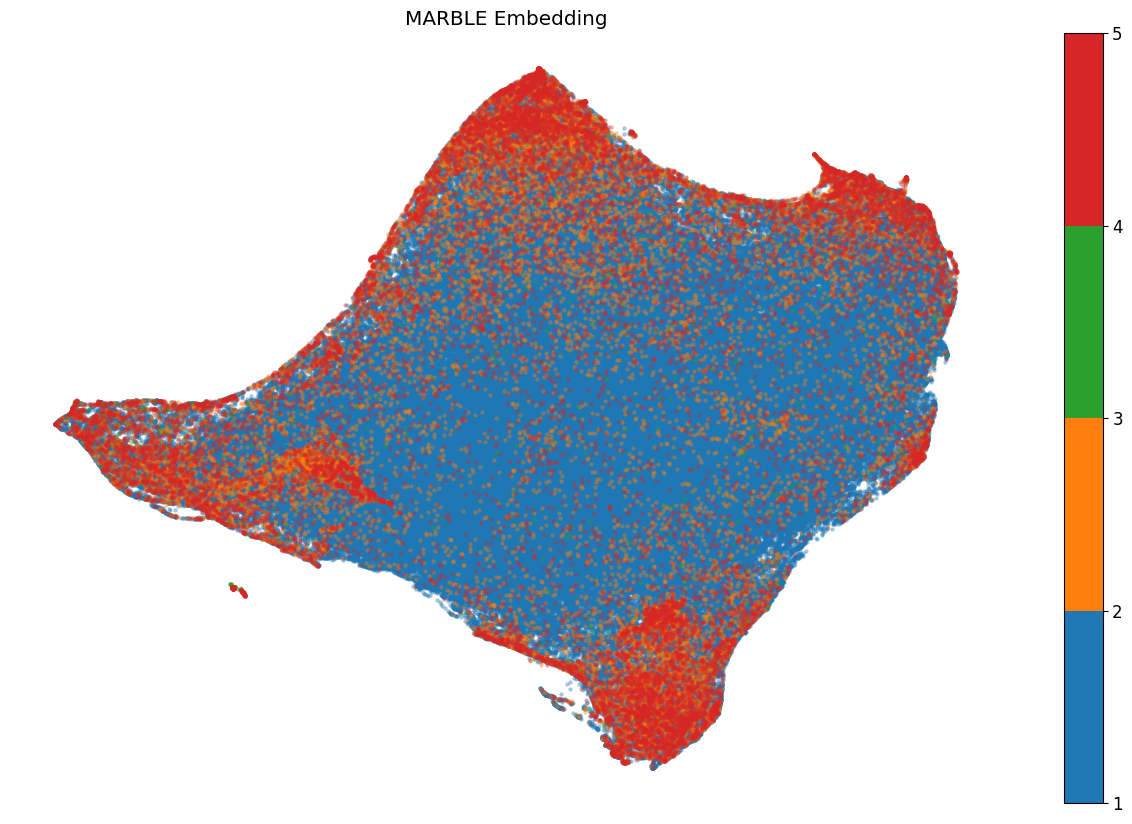

Performed PCA embedding on embedded results.
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!


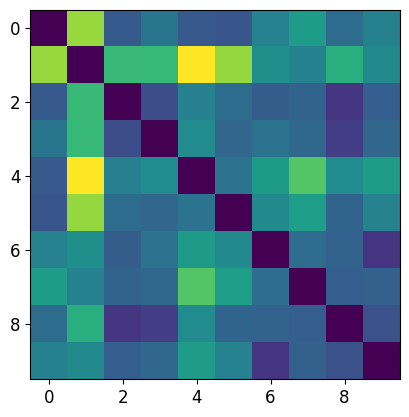

<Figure size 400x400 with 0 Axes>

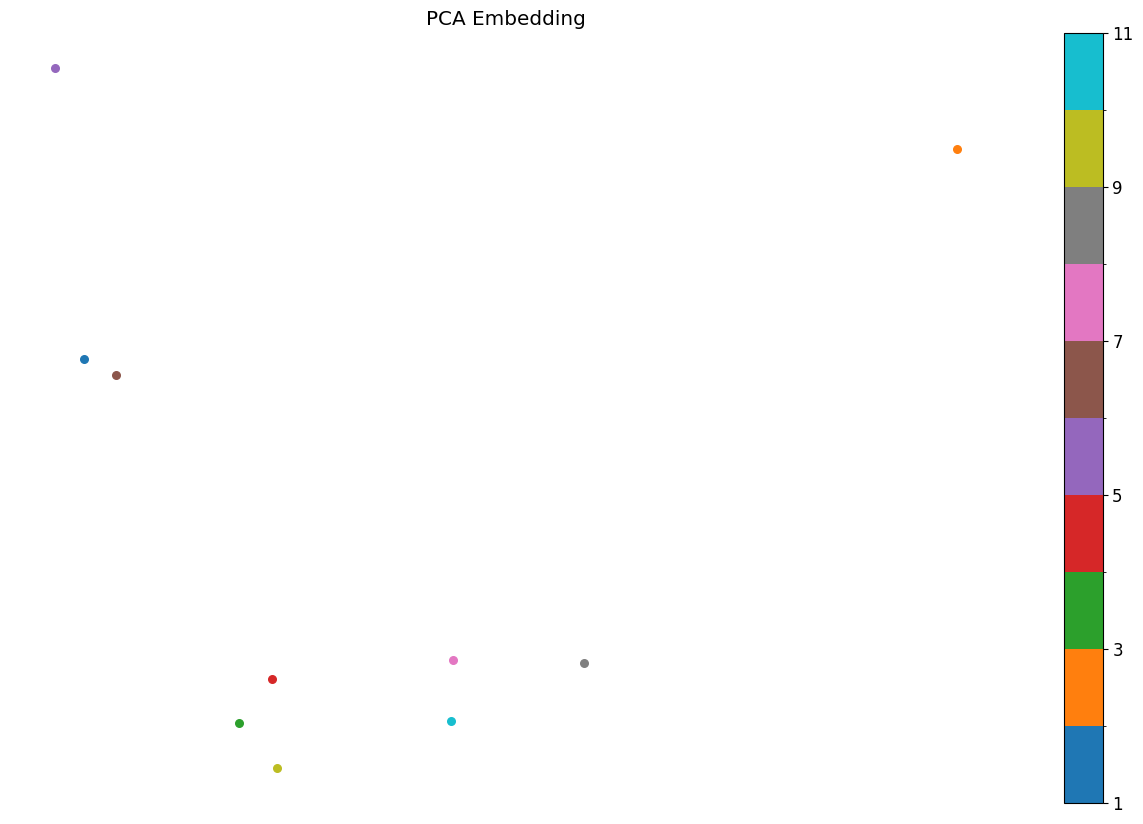

/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Performed umap embedding on embedded results.
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!


<Figure size 400x400 with 0 Axes>

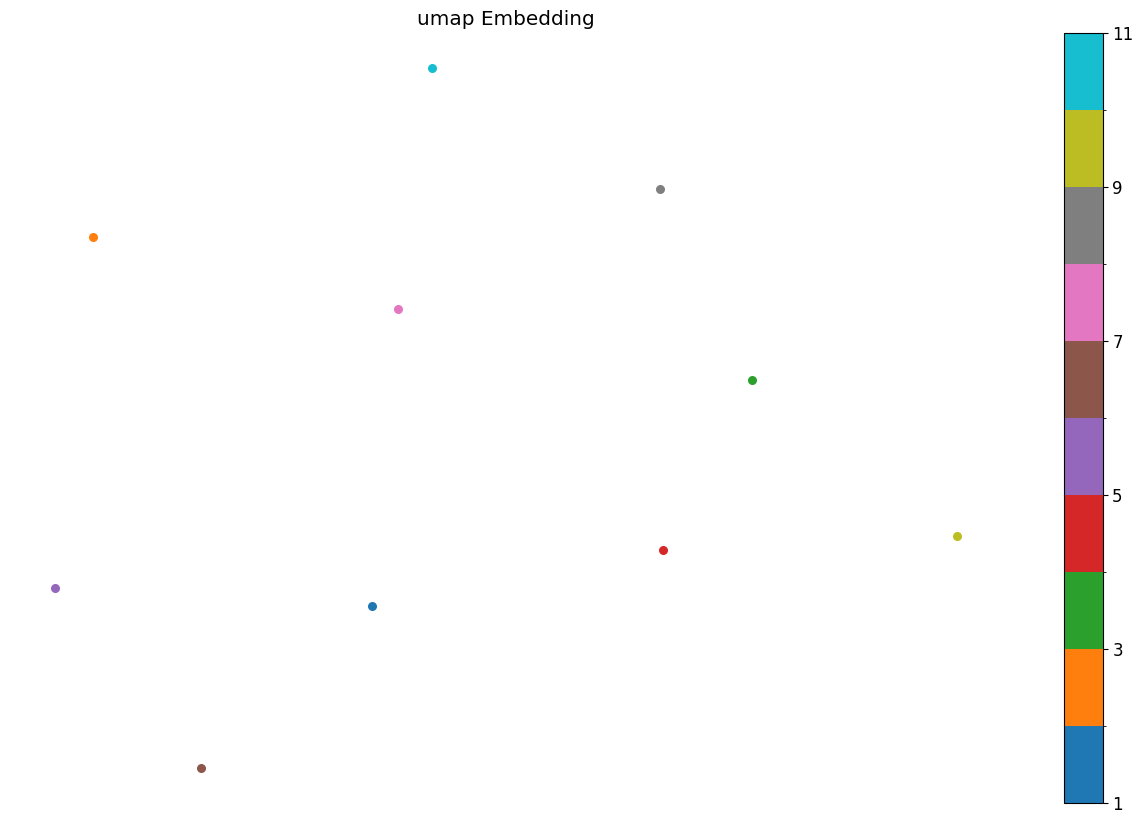

/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/honglab/leijiaxin/anaconda3/envs/MARBLE/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of 

Performed Isomap embedding on embedded results.
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!


<Figure size 400x400 with 0 Axes>

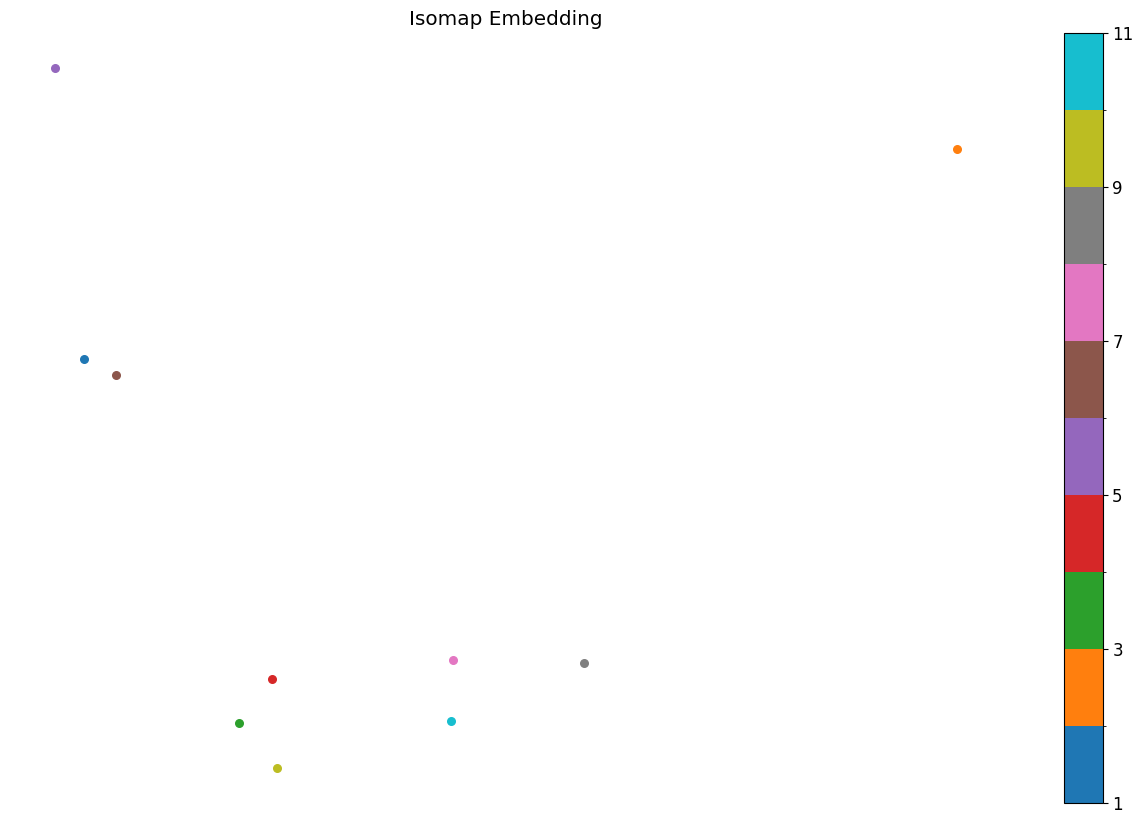

Performed MDS embedding on embedded results.
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!


<Figure size 400x400 with 0 Axes>

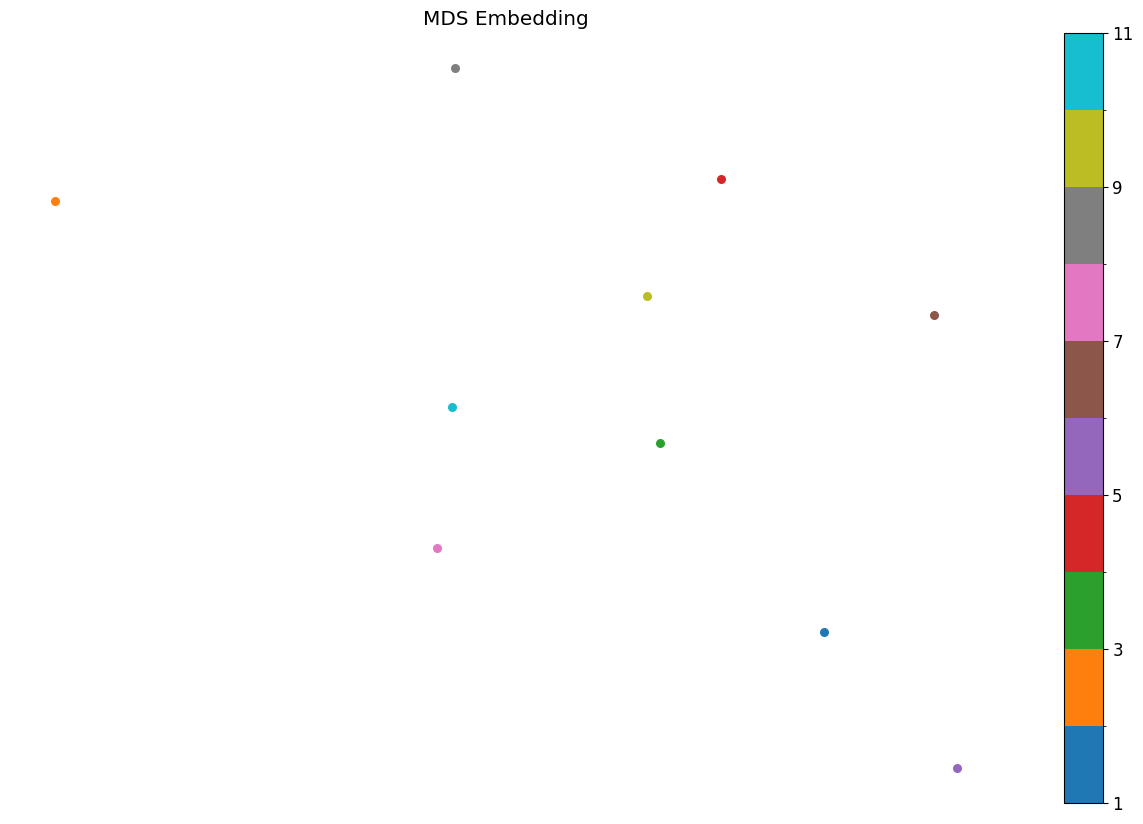

Results saved to temp_Figures/ directory.


In [7]:
# Visualize embeddings
plt.figure(figsize=(4, 4))

ax = plotting.embedding(transformed_Dataset, transformed_Dataset.label.numpy().flatten().astype(int))
plt.title('MARBLE Embedding')
plt.savefig('temp_Figures/eeg_marble_embedding.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6.4, 4.8))
im = plt.imshow(transformed_Dataset.dist)

# Plot different embeddings
embed_types = ['PCA',  'umap']

for embed_typ in embed_types:
    emb, _ = geometry.embed(transformed_Dataset.dist, embed_typ=embed_typ)
    plt.figure(figsize=(4, 4))
    ax = plotting.embedding(emb, np.array(range(0,10)),s=30, alpha=1)
    plt.title(f'{embed_typ} Embedding')
    plt.savefig(f'temp_Figures/eeg_{embed_typ.lower()}_embedding.png', dpi=300, bbox_inches='tight')
    plt.show()

print("=" * 40)
print("Results saved to temp_Figures/ directory.")